In [1]:
import pandas as pd

In [4]:
data = pd.read_csv('prenoms.csv', sep= ";")

In [7]:
data

,sexe,preusuel,annais,nombre
0,1,_PRENOMS_RARES,1900,1249
1,1,_PRENOMS_RARES,1901,1342
2,1,_PRENOMS_RARES,1902,1330
3,1,_PRENOMS_RARES,1903,1286
4,1,_PRENOMS_RARES,1904,1430
...,...,...,...,...
686533,2,ZYNEB,2018,5
686534,2,ZYNEB,2019,7
686535,2,ZYNEB,2020,8
686536,2,ZYNEB,2021,6


In [10]:
data = data[data['preusuel'] != "_PRENOMS_RARES"]

In [11]:
data

,sexe,preusuel,annais,nombre
122,1,A,1980,3
123,1,A,1998,3
124,1,A,XXXX,21
125,1,AADAM,2009,4
126,1,AADAM,2014,3
...,...,...,...,...
686533,2,ZYNEB,2018,5
686534,2,ZYNEB,2019,7
686535,2,ZYNEB,2020,8
686536,2,ZYNEB,2021,6


In [12]:
data = data[data['preusuel'].str.len() >= 3]

In [15]:
data

,sexe,preusuel,annais,nombre
125,1,AADAM,2009,4
126,1,AADAM,2014,3
127,1,AADAM,2015,3
128,1,AADAM,2016,4
129,1,AADAM,2017,4
...,...,...,...,...
686533,2,ZYNEB,2018,5
686534,2,ZYNEB,2019,7
686535,2,ZYNEB,2020,8
686536,2,ZYNEB,2021,6


In [21]:
data.rename(columns={'preusuel': 'name'}, inplace=True)

/tmp/ipykernel_25909/4268650803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'preusuel': 'name'}, inplace=True)


In [23]:
data['name'] = data['name'].str.replace(r'[^\w\s]+', '')

/tmp/ipykernel_25909/4026639560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['name'] = data['name'].str.replace(r'[^\w\s]+', '')


In [26]:
data.dropna(inplace= True)

/tmp/ipykernel_25909/1335109364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace= True)


In [40]:
data['name'] = data['name'].str.replace('\d+', '')

In [42]:
data.name = data.name.str.strip()

In [46]:
vowels = ('a','e','i','o','u')

In [51]:
data['sexe'] = data['sexe'].replace({1: 'm', 2: 'f'})
df = data.assign(isVowel = lambda x: x.name.str.endswith(vowels).astype('int'))
df['NameLen'] = df['name'].str.len()


In [53]:
df.groupby(['sexe'])['NameLen'].mean()

sexe
f    6.654010
m    6.356506
Name: NameLen, dtype: float64

<Axes: xlabel='sexe,NameLen'>

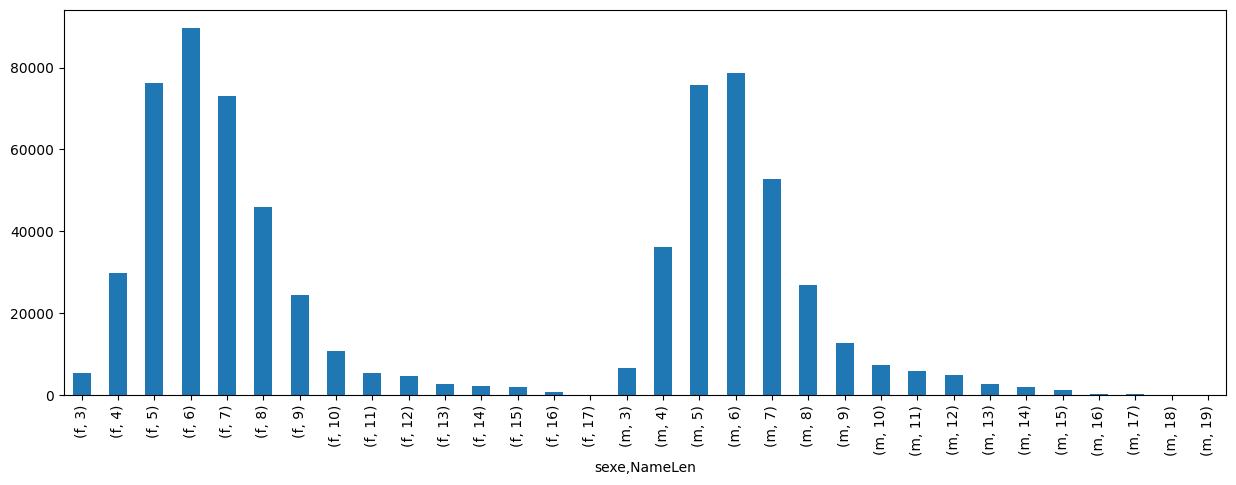

In [54]:
df.groupby(['sexe','NameLen'])['name'].count().plot(kind = 'bar',figsize=(15,5))

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [56]:

le.fit(df.sexe)
df.sexe = le.transform(df.sexe)

In [57]:
le.classes_

array(['f', 'm'], dtype=object)

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
n=3
vect = CountVectorizer(analyzer=lambda x: (x[-i-1:] for i in range(0,min(n,len(x)))))

In [62]:
vect.fit(df.name)

CountVectorizer(analyzer=<function <lambda> at 0x7fbe8658ce50>)

In [64]:
mat = vect.transform(df.name).todense()

MemoryError: Unable to allocate 18.8 GiB for an array with shape (685523, 3677) and data type int64